<a href="https://colab.research.google.com/github/AndreaHernandez5072/CienciaDatos/blob/main/Laboratorio8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Dividir data en data learn y data train
from sklearn.model_selection import train_test_split
#Permite crear un data
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
#Metricas para evaluar el modelo
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

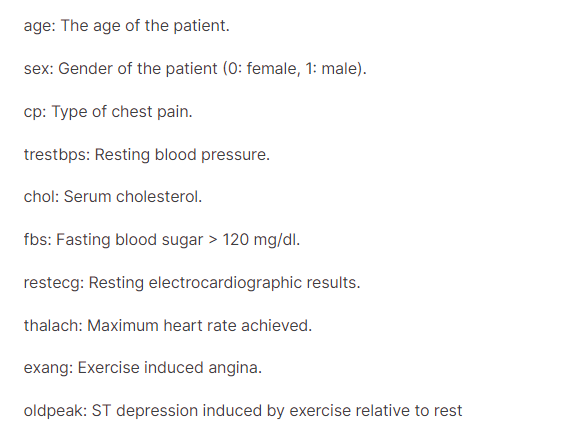

In [16]:
df = pd.read_csv("heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [17]:
#identificación de campos nulos
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [18]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


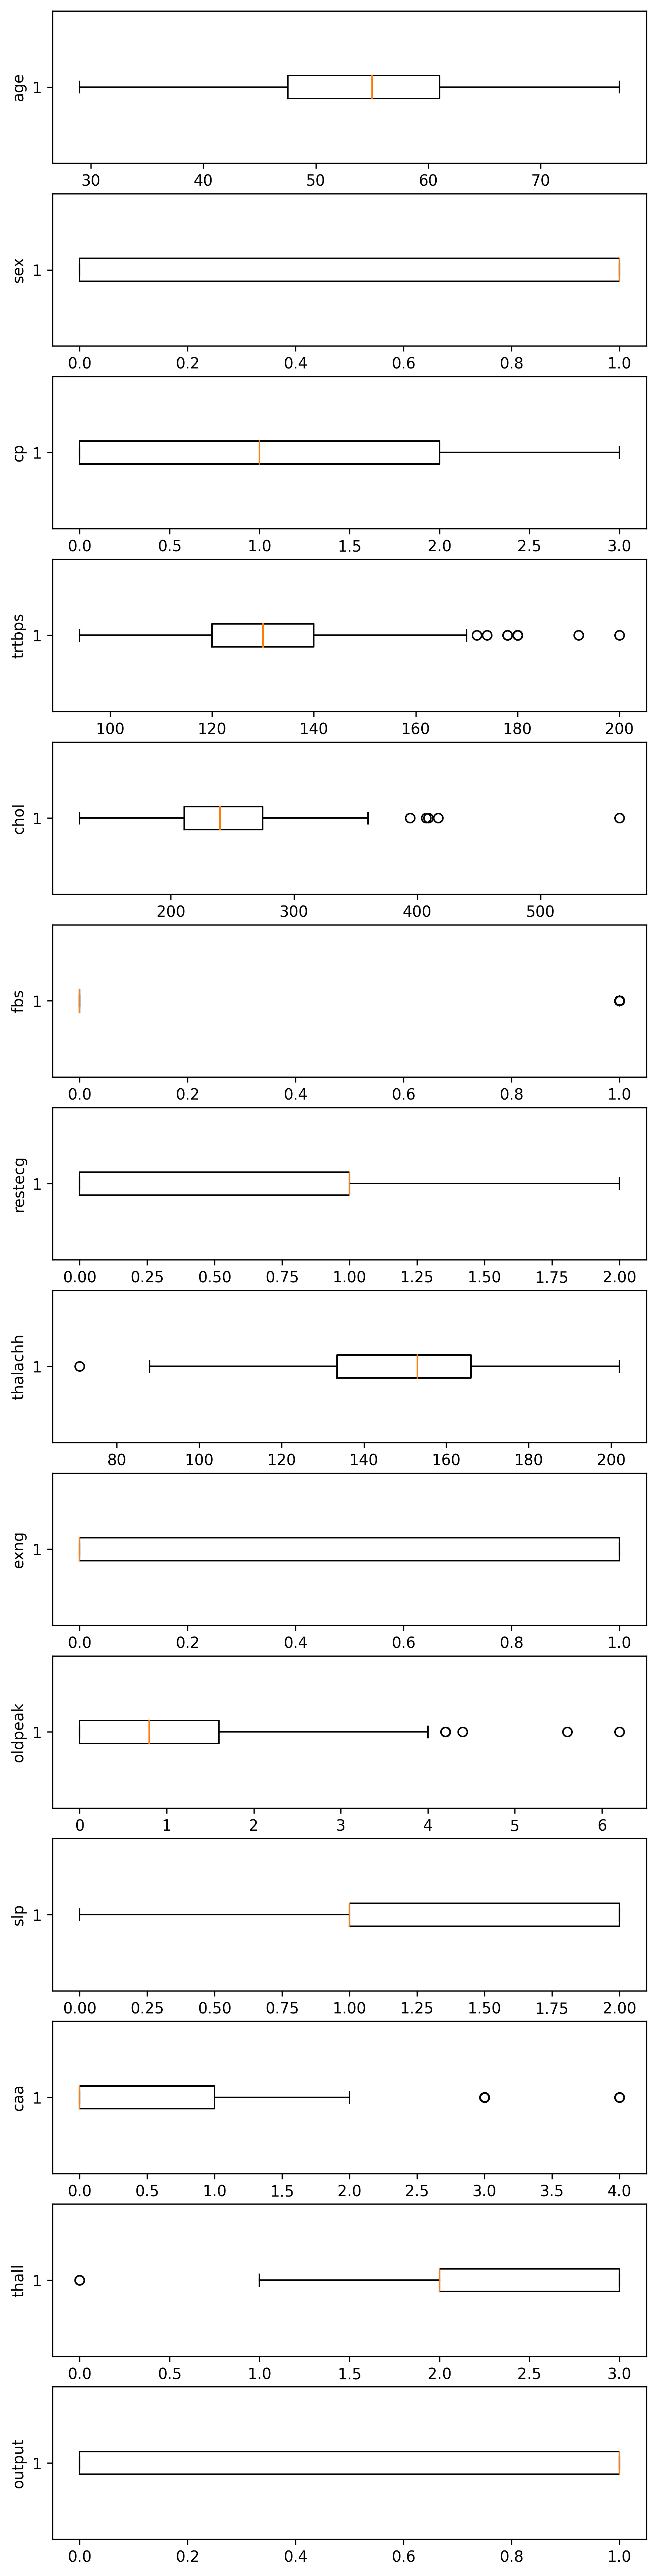

In [19]:
#Detección de Outliers
def mostrarOutliers(dataset):
  fig,axs= plt.subplots(14,1,dpi=300,figsize=(7,30))
  i = 0
  for col in dataset.columns:
    axs[i].boxplot(df[col],vert=False)
    axs[i].set_ylabel(col)
    i+=1
  plt.show()

mostrarOutliers(df)

In [20]:
def EliminaOutliers(col,dataset,cleandata):
  q1,q3 = np.percentile(dataset[col],[25,75])
  iqr=q3-q1
  limite_inferior=q1-(1.5*iqr)
  limite_superior=q3+(1.5*iqr)
  cleandata=dataset[(dataset[col]>=limite_inferior) & (dataset[col]<=limite_superior)]
  return cleandata

In [21]:
clean_data1 = df
clean_data1 = EliminaOutliers("age",df,clean_data1)
clean_data1 = EliminaOutliers("sex",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("cp",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("trtbps",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("chol",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("fbs",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("restecg",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("thalachh",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("exng",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("oldpeak",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("slp",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("caa",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("thall",clean_data1,clean_data1)
clean_data1 = EliminaOutliers("output",clean_data1,clean_data1)
clean_data1.describe()
#Eliminan más de 25% de los datos, se decedira hacer un tratamiento de los datos por media

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.00000,228.000000,228.000000
mean,53.333333,0.675439,0.942982,128.671053,242.372807,0.0,0.548246,151.070175,0.315789,0.946053,1.451754,0.47807,2.315789,0.578947
std,9.229016,0.469241,1.020190,15.349142,44.329827,0.0,0.516125,22.492963,0.465852,1.035422,0.587945,0.69893,0.560299,0.494814
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,45.000000,0.000000,0.000000,120.000000,209.750000,0.0,0.000000,137.500000,0.000000,0.000000,1.000000,0.00000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,155.000000,0.000000,0.600000,1.500000,0.00000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,269.250000,0.0,1.000000,168.250000,1.000000,1.600000,2.000000,1.00000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.00000,3.000000,1.000000


<Axes: xlabel='output', ylabel='Count'>

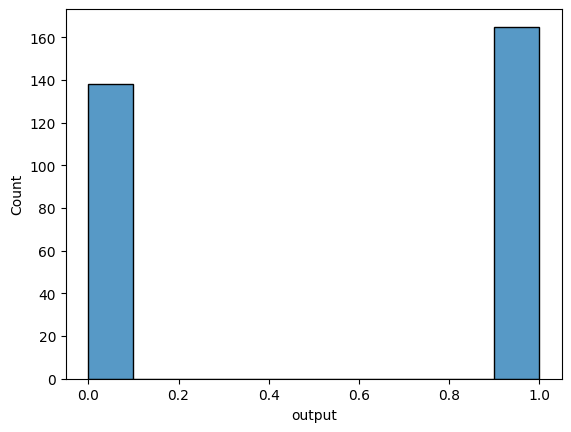

In [22]:
sns.histplot(df['output'])

In [23]:
def TratamientoOutliers(col,dataset,cleandata):
  #calcular los cuartiles
  q1,q3=np.percentile(dataset[col],[25,75])
  #Calcular iqr
  iqr=q3-q1
  limite_inferior=q1-(1.5*iqr)
  limite_superior=q3+(1.5*iqr)
  #Similar a un IF
  dataset[col]=np.where(dataset[col]>limite_superior,limite_superior,np.where(dataset[col]<limite_inferior,limite_inferior,dataset[col]))

In [24]:
clean_data2=df
TratamientoOutliers("trtbps",clean_data2,clean_data2)
TratamientoOutliers("chol",clean_data2,clean_data2)
TratamientoOutliers("thalachh",clean_data2,clean_data2)
TratamientoOutliers("oldpeak",clean_data2,clean_data2)
TratamientoOutliers("caa",clean_data2,clean_data2)
TratamientoOutliers("thall",clean_data2,clean_data2)
clean_data2.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.280528,245.134488,0.148515,0.528053,149.692244,0.326733,1.024422,1.399340,0.671617,2.316832,0.544554
std,9.082101,0.466011,1.032052,16.582241,47.552910,0.356198,0.525860,22.762004,0.469794,1.110127,0.616226,0.885078,0.601004,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,84.750000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,369.750000,1.000000,2.000000,202.000000,1.000000,4.000000,2.000000,2.500000,3.000000,1.000000


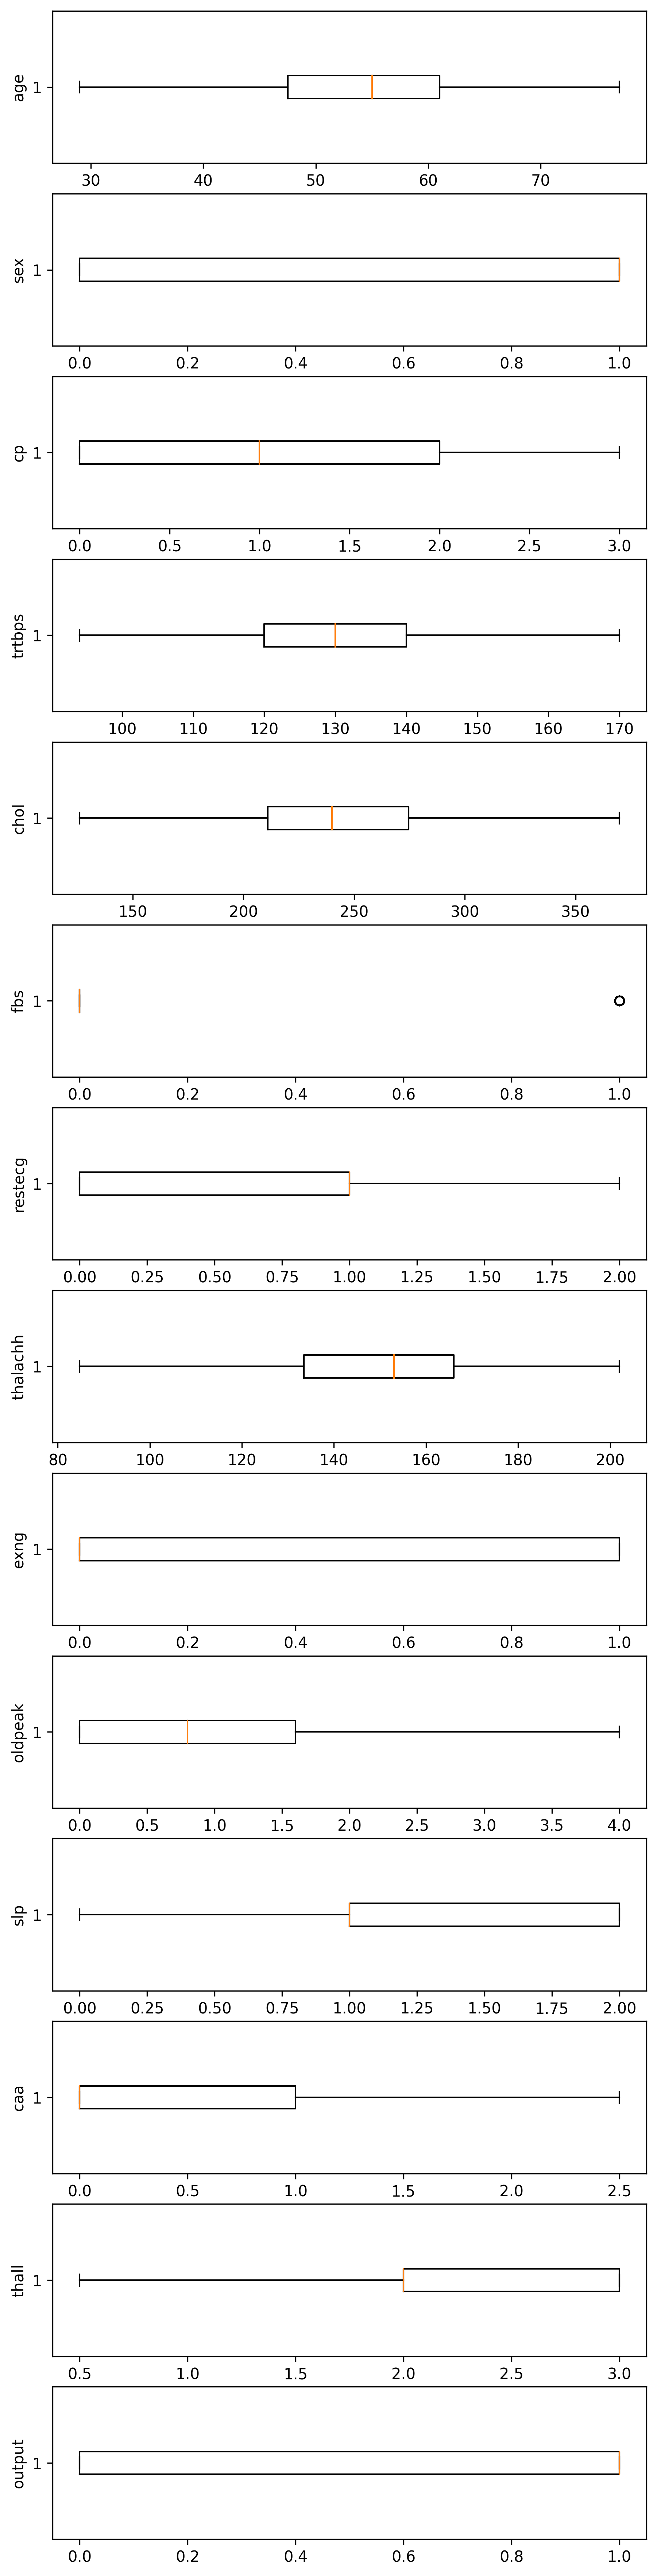

In [25]:
#visualizar los Outliers
#Detección de Outliers
def mostrarOutliers(dataset):
  fig,axs= plt.subplots(14,1,dpi=300,figsize=(7,30))
  i = 0
  for col in dataset.columns:
    axs[i].boxplot(df[col],vert=False)
    axs[i].set_ylabel(col)
    i+=1
  plt.show()

mostrarOutliers(df)

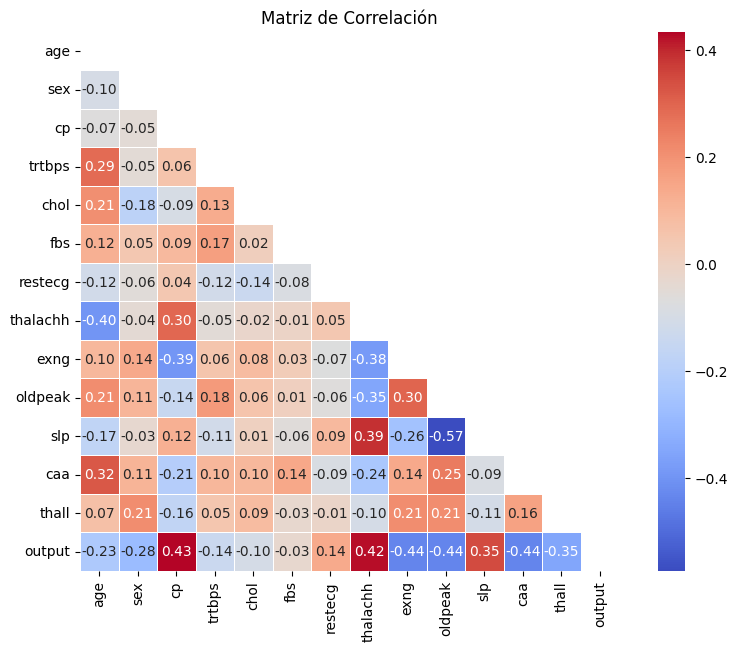

In [35]:
def identificarCorrelacion(dataset):
  f = dataset.corr()
  mask=np.triu(np.ones_like(f))
  #Ajustando el tamaño para que se vea mejor
  plt.figure(figsize=[10,7])
  sns.heatmap(f,annot=True,cmap="coolwarm",mask=mask,fmt=".2f",square=True, linewidths=.5)
  plt.title("Matriz de Correlación")
  plt.show()

identificarCorrelacion(clean_data2)

In [27]:
def creacionModelo(dataset,varExp1,varExp2,varExp3,varOb,noDTest):
  #Seleccionmos las variables explicativas
  data1 = dataset
  data1 = data1.drop(varExp1, axis=1)
  data1 = data1.drop(varExp2, axis=1)
  data1 = data1.drop(varExp3, axis=1)
  #Variable objetivo
  y = data1[varOb]
  #Variables explicativas
  x=data1.drop(varOb,axis=1)
  #División de dataset en entrenamiento y TEST
  #Primero, revuelve los indices, luego, divide el data set
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=noDTest,stratify=y,random_state=101)

  model=LogisticRegression()
  model.fit(x_train,y_train)
  return model,x_train,x_test,y_train,y_test


In [28]:
def indicandoPrecision(y_test,y_hat):
  #True positive/(true positive+false positive)
  print("Precision: ", metrics.precision_score(y_test,y_hat))
  #True positive/(true positive+false negative)
  print("Recal: ",metrics.recall_score(y_test,y_hat))
  #(Precision*recall)/(precision+recall)
  print("F1:",f1_score(y_test,y_hat))

# Primer modelo
Usara cp, thalachh, slp

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


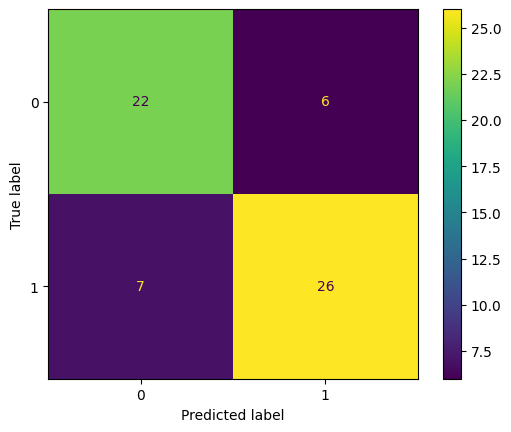

In [29]:
modeloExperimento1,x_train1,x_test1,y_train1,y_test1=creacionModelo(clean_data2,"cp","thalachh","slp","output",0.2)
y_hat1=modeloExperimento1.predict(x_test1)
y_hat1
cm=confusion_matrix(y_test1,y_hat1)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [30]:
indicandoPrecision(y_test1,y_hat1)

Precision:  0.8125
Recal:  0.7878787878787878
F1: 0.8


# Segundo modelo
Usara cp, thalachh y restecg

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


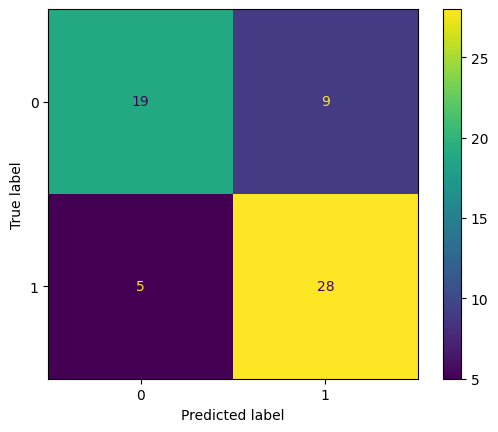

In [31]:
modeloExperimento2,x_train2,x_test2,y_train2,y_test2=creacionModelo(clean_data2,"cp","thalachh","restecg","output",0.2)
y_hat2=modeloExperimento2.predict(x_test2)
cm=confusion_matrix(y_test2,y_hat2)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [32]:
indicandoPrecision(y_test2,y_hat2)

Precision:  0.7567567567567568
Recal:  0.8484848484848485
F1: 0.8000000000000002


# Tercer modelo
Usara thalachh, slp y resteccg

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


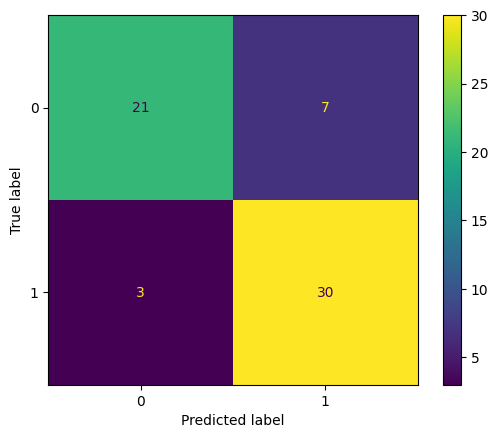

In [37]:
modeloExperimento3,x_train3,x_test3,y_train3,y_test3=creacionModelo(clean_data2,"slp","thalachh","restecg","output",0.2)
y_hat3=modeloExperimento3.predict(x_test3)
cm=confusion_matrix(y_test3,y_hat3)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [38]:
indicandoPrecision(y_test3,y_hat3)

Precision:  0.8108108108108109
Recal:  0.9090909090909091
F1: 0.8571428571428571


# Cuarto experimento

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


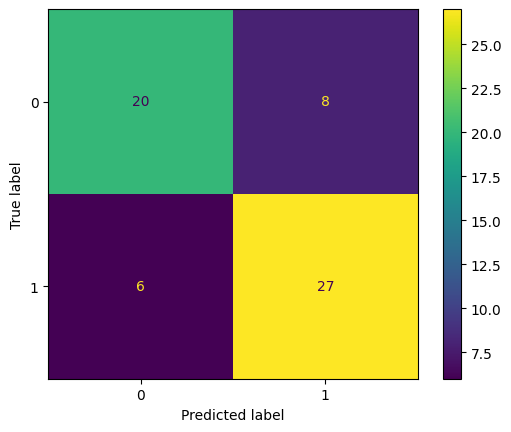

In [42]:
modeloExperimento4,x_train4,x_test4,y_train4,y_test4=creacionModelo(clean_data2,"exng","oldpeak","cp","output",0.2)
y_hat4=modeloExperimento4.predict(x_test4)
cm=confusion_matrix(y_test4,y_hat4)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [43]:
indicandoPrecision(y_test4,y_hat4)

Precision:  0.7714285714285715
Recal:  0.8181818181818182
F1: 0.7941176470588236
